In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading file 
df = pd.read_csv("C:/Users/kderg/OneDrive/Escritorio/VoLo/Energy Transition/Datasets/2010-2022_ResidentialRates_PerState.csv")
print(df.shape)
df.head()

(676, 6)


,Year,STATE,Thousand Dollars,Megawatthours,Count,Cents/kWh
0,2022,AK,"473,751","2,050,472","294,370",23.10
1,2022,AL,"4,690,788","32,923,573","2,329,559",14.25
2,2022,AR,"2,320,527","19,250,661","1,445,528",12.05
3,2022,AZ,"4,994,758","38,367,633","3,013,393",13.02
4,2022,CA,"23,136,718","89,542,208","13,942,174",25.84


In [3]:
# Cleaning data
df = df.drop(["Thousand Dollars","Megawatthours", "Count"], axis =1)
df = df[(df["STATE"] != "US") & (df['STATE'] != "DC")]
df.shape

(650, 3)

In [4]:
# New Col
dereg = ['CA','CT','DE','MA','MS','MD','MI','NH','NJ','NY','OH','OR','PA','RI','TX','VA']
df['Is_Deregulated'] = df['STATE'].apply(lambda x: x in dereg)

# Group by deregulated and year
grouped_df = df.groupby(['Year','Is_Deregulated']).agg({'Cents/kWh': 'mean'})
grouped_df = grouped_df.reset_index()

# Separating into two dfs
dereg_df = grouped_df[grouped_df["Is_Deregulated"]== True]
reg_df = grouped_df[grouped_df['Is_Deregulated'] == False ]

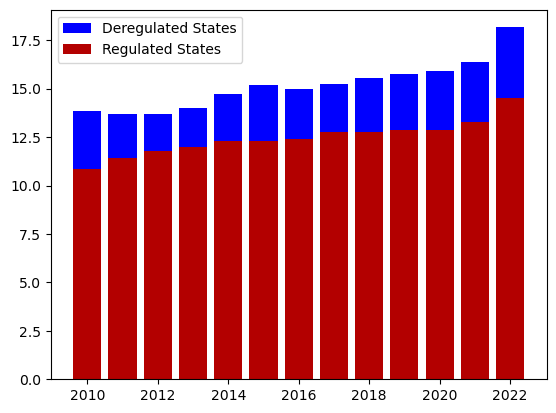

In [5]:
# Plotting stacked bar chart
plt.bar(dereg_df["Year"], dereg_df["Cents/kWh"], color = 'blue')
plt.bar(reg_df["Year"], reg_df["Cents/kWh"], color = (0.7, 0, 0))
plt.legend(['Deregulated States', 'Regulated States'])


Text(0.5, 1.0, 'Average Electric Rates in Deregulated and Regulated States')

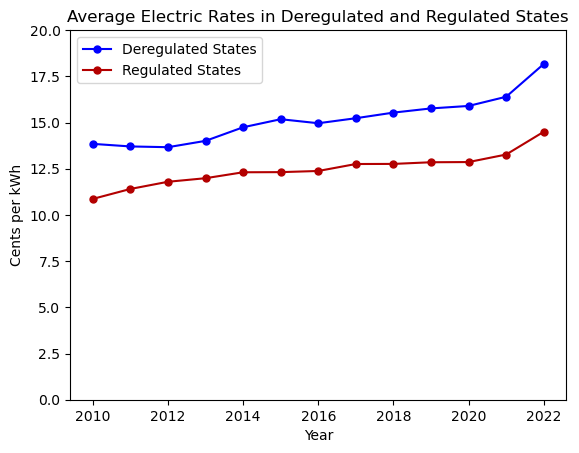

In [7]:
# Plotting Line graph
plt.plot(dereg_df["Year"], dereg_df["Cents/kWh"], color = 'blue', marker = 'o', markersize = '5')
plt.plot(reg_df["Year"], reg_df["Cents/kWh"], color = (0.7, 0, 0), marker = 'o', markersize = '5')
plt.legend(['Deregulated States', 'Regulated States', 'Oregon'])
plt.ylim(0,20)
plt.xlabel("Year")
plt.ylabel("Cents per kWh")
plt.title('Average Electric Rates in Deregulated and Regulated States')